In [1]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as spop

In [10]:
#specifying the sample
ticker = 'IOC.NS'
start = '2015-12-31'
#end = '2021-06-25'
#downloading data
prices = yf.download(ticker, start)['Close']


[*********************100%***********************]  1 of 1 completed


In [11]:
#calculating returns
returns = np.array(prices)[1:]/np.array(prices)[:-1] - 1
#starting parameter values - sample mean and variance
mean = np.average(returns)
var = np.std(returns)**2
print("Means: ",mean,"Std :",var)

Means:  0.0003540736584707672 Std : 0.00037167226328663655


/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_1036/4244608495.py:15: RuntimeWarning: invalid value encountered in scalar power
  conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_1036/4244608495.py:8: RuntimeWarning: invalid value encountered in scalar power
  long_run = (omega/(1 - alpha - beta))**(1/2)


GARCH model parameters

mu 0.000187
omega 2.8e-05
alpha 0.1269
beta 0.8044
long-run volatility 0.0202
log-likelihood 4781.3131


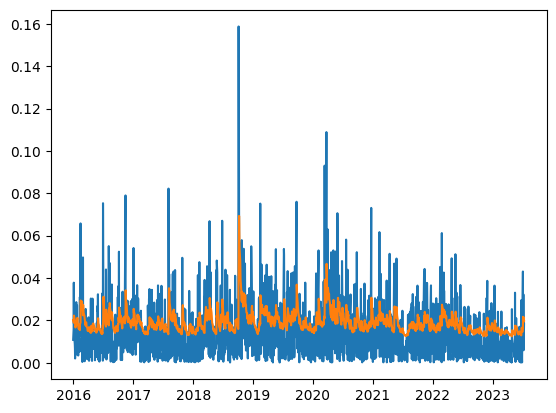

In [12]:
def garch_mle(params):
    #specifying model parameters
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = returns - mu
    realised = abs(resid)
    conditional = np.zeros(len(returns))
    conditional[0] =  long_run
    for t in range(1,len(returns)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood
#maximising log-likelihood
res = spop.minimize(garch_mle, [mean, var, 0, 0], method='Nelder-Mead')
#retrieving optimal parameters
params = res.x
mu = res.x[0]
omega = res.x[1]
alpha = res.x[2]
beta = res.x[3]
log_likelihood = -float(res.fun)
#calculating realised and conditional volatility for optimal parameters
long_run = (omega/(1 - alpha - beta))**(1/2)
resid = returns - mu
realised = abs(resid)
conditional = np.zeros(len(returns))
conditional[0] =  long_run
for t in range(1,len(returns)):
    conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
#printing optimal parameters
print('GARCH model parameters')
print('')
print('mu '+str(round(mu, 6)))
print('omega '+str(round(omega, 6)))
print('alpha '+str(round(alpha, 4)))
print('beta '+str(round(beta, 4)))
print('long-run volatility '+str(round(long_run, 4)))
print('log-likelihood '+str(round(log_likelihood, 4)))
#visualising the results
plt.figure(1)
plt.rc('xtick', labelsize = 10)
plt.plot(prices.index[1:],realised)
plt.plot(prices.index[1:],conditional)
plt.show()

In [9]:
data =  { "garch" : conditional, "actual" : realised}
pd_data =  pd.DataFrame(data)
pd_data

,garch,actual
0,0.011031,0.020390
1,0.012305,0.001732
2,0.011661,0.006485
3,0.011237,0.023188
4,0.012954,0.003489
...,...,...
1847,0.006776,0.002561
1848,0.006561,0.000388
1849,0.006314,0.004215
1850,0.006232,0.009367
